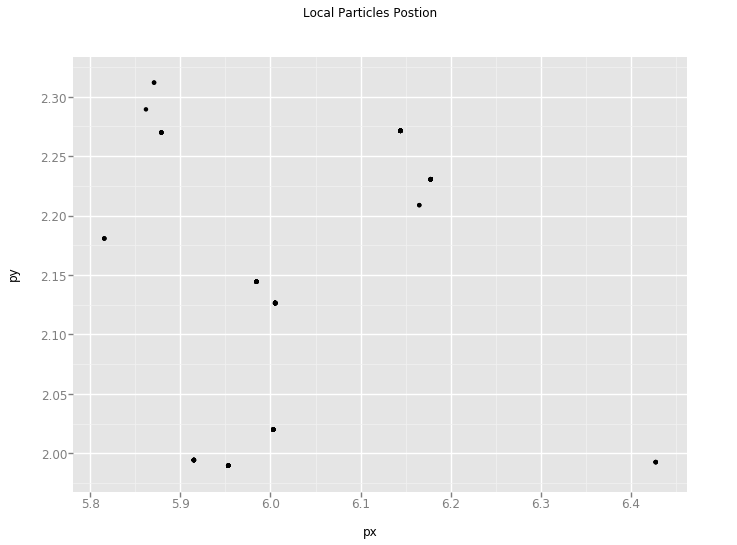

<ggplot: (106673746233)>


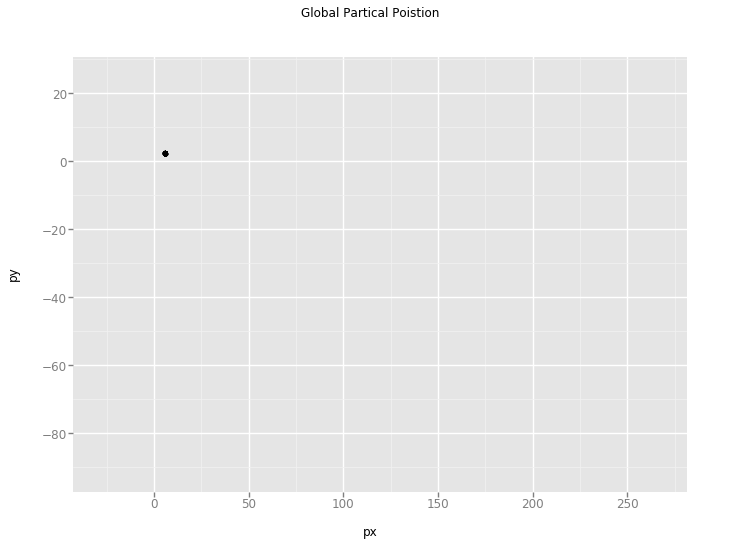

<ggplot: (106673746289)>


In [8]:
from ggplot import *
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from IPython.display import display, HTML

# NOTE: Make sure the folder parfileoutput is the same as the one from data/parfilouput which is generated using the C++ code 
#       for the particle filter
path = 'parfiloutput/'

# Flag to switch between matplot and ggplot
PLOT_LIB_SWITCH = 0

# Column names for the data frame
pf_col_names = ['px', 'py', 'theta']

# Inital Max values for x, y to create a map 
max_x = 0
max_y = 0
# Initial Min values for x, y to create a map
min_x = 10000.0
min_y = 10000.0

for filename in os.listdir(path):
    # Full path name to file
    path_to_file = path + filename
    with open(path_to_file, 'r') as file:
        # Read the file data into a data frame
        pf_frame = pd.read_csv(file, sep=",", header=None, names=pf_col_names)
        
        # Get the Px, Py and Theta values for plotting
        px = pf_frame['px']
        py = pf_frame['py']
        
        # Get the maximum and minimum map values
        if(px.values.max() > max_x):
            max_x = px.values.max()
        if(py.values.max() > max_y):
            max_y = py.values.max()
            
        if(px.values.min() < min_x):
            min_x = px.values.min()
        if(py.values.min() < min_y):
            min_y = py.values.min()
            
for filename in os.listdir(path):
    # Full path name to file
    path_to_file = path + filename
    with open(path_to_file, 'r') as file:
        # Read the file data into a data frame
        pf_frame = pd.read_csv(file, sep=",", header=None, names=pf_col_names)
            
        if PLOT_LIB_SWITCH:
            # Create a scatter plot of the particles
            fig = plt.figure(figsize=(20, 20))
            ax = fig.add_subplot(111)
            Pos = ax.scatter(px, py, c='g', marker='o')
            ax.set_title('Position of Particles')
            ax.set_xlabel('Px')
            x_major_ticks = np.arange(min(px), max(px), 0.003)
            ax.set_xticks(x_major_ticks)
            ax.set_xticklabels(x_major_ticks, rotation=90)
            ax.set_ylabel('Py')        
            y_major_ticks = np.arange(min(py), max(py), 0.003)
            ax.set_yticks(y_major_ticks)
            ax.legend([Pos], ["Position"])
            plt.show()
        else:
            plot1 = ggplot(pf_frame, aes('px', 'py')) + geom_point() + ggtitle('Local Particles Postion')           
            plot2 = ggplot(pf_frame, aes('px', 'py')) + geom_jitter() + xlim(-abs(min_x - 1), max_x + 1) + ylim(-abs(min_y - 1), max_y + 1) + ggtitle('Global Partical Poistion') 
            
            # Save plots under a new directory
            par_file_plot_dir = "parfilplot/"
            if not os.path.exists(par_file_plot_dir):
                os.makedirs(par_file_plot_dir)
            
            # Save plots under a new directory
            global_par_file_plot_dir = "globalparfilplot/"
            if not os.path.exists(global_par_file_plot_dir):
                os.makedirs(global_par_file_plot_dir)
                
            # Save plot under a the same .txt file name after 
            # replacing the ".txt" file extension
            plot_file_name1 = par_file_plot_dir + filename
            plotname1 = plot_file_name1.replace(".txt", "")
            #plot1.save(plotname1)
            print(plot1)
            
            plot_file_name2 = global_par_file_plot_dir + filename
            plotname2 = plot_file_name2.replace(".txt", "")            
            #plot2.save(plotname2)
            print(plot2)
            
        break